In [137]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
import torch
import torchvision
from skimage import img_as_ubyte
from skimage import io

## load prediction and images

In [146]:
prediction.shape

(7808, 3)

In [21]:
prediction = pd.read_csv('save_temp/prediction.csv',index_col=0)

In [22]:
prediction.ground_truth.value_counts()

1    4797
0    1586
2    1318
3      76
4      19
5      11
6       1
Name: ground_truth, dtype: int64

(array([ 1586.,  4797.,  1318.,    76.,    19.,    12.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 6 Patch objects>)

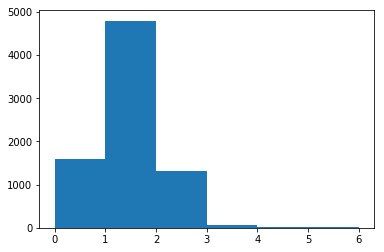

In [49]:
plt.hist(prediction.ground_truth,bins=6)
plt.title

Text(0,0.5,'count')

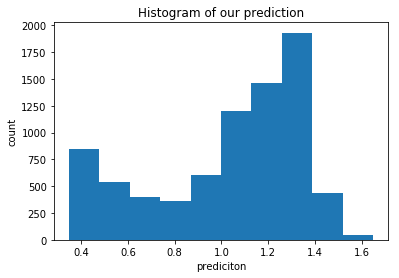

In [43]:
plt.hist(prediction.prediction)
plt.title('Histogram of our prediction')
plt.xlabel('prediciton')
plt.ylabel('count')

In [24]:
prediction.prediction.max()

1.6496207714080811

In [25]:
images = pickle.load(open('save_temp/prediction_images.pkl',"rb"))

In [26]:
len(images)

61

In [27]:
images[0].shape

(128, 64, 64)

In [37]:
all_images = np.concatenate([arr for arr in images])

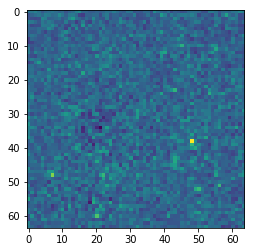

In [18]:
plt.imshow(images[0].reshape((64,64)))

In [40]:
prediction['smooth_prediction'] = np.round(prediction.prediction)

In [41]:
prediction.head()

,ground_truth,prediction,smooth_prediction
0,0,0.704657,1.0
1,1,1.109340,1.0
2,1,1.327718,1.0
3,2,0.569000,1.0
4,1,1.119682,1.0


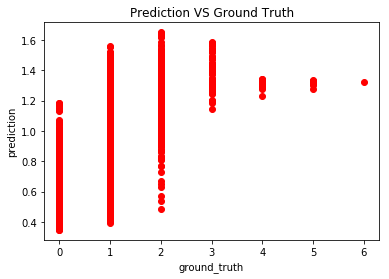

In [46]:
plt.plot(prediction.ground_truth, prediction.prediction, 'ro')
plt.xlabel('ground_truth')
plt.ylabel('prediction')
plt.title('Prediction VS Ground Truth')
plt.show()

In [59]:
prediction[prediction.ground_truth==6].index[0]

4082

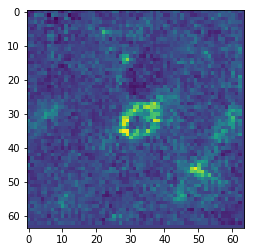

In [65]:
plt.imshow(all_images[prediction[prediction.ground_truth==6].index[0],:,:])

In [122]:
five_list=list(prediction[prediction.ground_truth==5].index)

In [123]:
five_numpy = np.expand_dims(img_as_ubyte(all_images[five_list,:,:]),axis=1)

/mnt/home/speimeng/anaconda3/envs/caiman/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [124]:
five_tensor = torch.from_numpy(five_numpy)

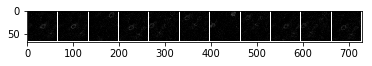

In [139]:
def imshow(img,ground_truth):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    io.imsave('save_temp/ground_truth_{}.png'.format(ground_truth),np.transpose(npimg, (1, 2, 0)))

# show images
imshow(torchvision.utils.make_grid(five_tensor,nrow=11,pad_value=255),5)

/mnt/home/speimeng/anaconda3/envs/caiman/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


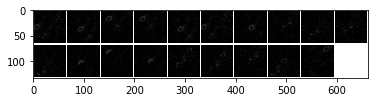

In [140]:
four_list=list(prediction[prediction.ground_truth==4].index)
four_numpy = np.expand_dims(img_as_ubyte(all_images[four_list,:,:]),axis=1)
four_tensor = torch.from_numpy(four_numpy)

# show images
imshow(torchvision.utils.make_grid(four_tensor,nrow=10,pad_value=255),4)

/mnt/home/speimeng/anaconda3/envs/caiman/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


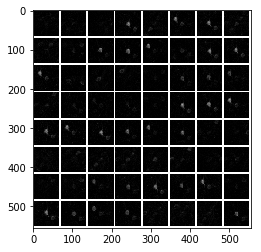

In [141]:
three_list=list(prediction[prediction.ground_truth==3].index)[:64]
three_numpy = np.expand_dims(img_as_ubyte(all_images[three_list,:,:]),axis=1)
three_tensor = torch.from_numpy(three_numpy)


# show images
imshow(torchvision.utils.make_grid(three_tensor,nrow=8,pad_value=255,padding=5),3)

/mnt/home/speimeng/anaconda3/envs/caiman/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


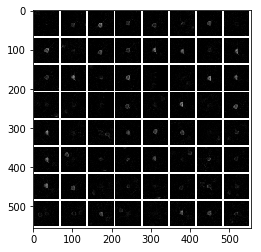

In [142]:
two_list=list(prediction[prediction.ground_truth==2].index)[:64]
two_numpy = np.expand_dims(img_as_ubyte(all_images[two_list,:,:]),axis=1)
two_tensor = torch.from_numpy(two_numpy)


# show images
imshow(torchvision.utils.make_grid(two_tensor,nrow=8,pad_value=255,padding=5),2)

/mnt/home/speimeng/anaconda3/envs/caiman/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


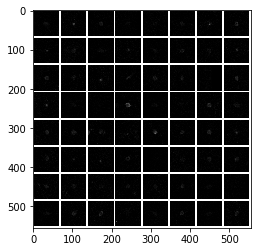

In [143]:
one_list=list(prediction[prediction.ground_truth==1].index)[:64]
one_numpy = np.expand_dims(img_as_ubyte(all_images[one_list,:,:]),axis=1)
one_tensor = torch.from_numpy(one_numpy)


# show images
imshow(torchvision.utils.make_grid(one_tensor,nrow=8,pad_value=255, padding=5),1)

/mnt/home/speimeng/anaconda3/envs/caiman/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


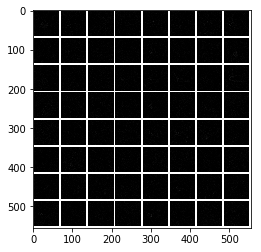

In [145]:
zero_list=list(prediction[prediction.ground_truth==0].index)[:64]
zero_numpy = np.expand_dims(img_as_ubyte(all_images[zero_list,:,:]),axis=1)
zero_tensor = torch.from_numpy(zero_numpy)


# show images
imshow(torchvision.utils.make_grid(zero_tensor,nrow=8,pad_value=255, padding=5),0)